# Mapping in Python with `geopandas`

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps
from pysal.contrib.viz import mapping as maps

In this lab, we will learn how to load, manipulate and visualize spatial data. In some senses, spatial data have become so pervasive that nowadays, they are usually included simply as "one more column" in a table. However, *spatial is special* and there are few aspects in which geographic data differ from standard numerical tables. In this session, we will extend the skills developed in the previous one about non-spatial data, and combine them. In the process, we will discover that, although with some particularities, dealing with spatial data in Python largely resembles dealing with non-spatial data.

To learn these concepts, we will be playing again with the geography of Liverpool. In particular we will use Census geographies (Available as part of the Census Data pack used before, see [link](https://data.cdrc.ac.uk/dataset/cdrc-2011-census-data-packs-for-local-authority-district-liverpool-e08000012)) and Ordnance Survey geospatial data, available to download also from the CDRC data store ([link](https://data.cdrc.ac.uk/dataset/cdrc-2015-os-geodata-pack-liverpool-e08000012)). To make the rest of the notebook easier to follow, let us set the paths to the main two folders here. We will call the path to the Liverpool Census pack `lcp_dir`, and that to the OS geodata `los_dir`:

In [2]:
lcp_dir = '../../../../data/Liverpool/'
los_dir = '../../../../data/E08000012/'

## Loading up spatial data

The easiest way to get from a file to a quick visualization of the data is by loading it as a `GeoDataFrame` and calling the `plot` command. The main library employed for all of this is `geopandas` which is a geospatial extension of the `pandas` library, already introduced before. `geopandas` supports exactly the same functionality that `pandas` does (in fact since it is built on top of it, so most of the underlying machinery is pure `pandas`), plus a wide range of spatial counterparts that make manipulation and general "munging" of spatial data as easy as non-spatial tables.

In two lines of code, we will obtain a graphical representation of the spatial data contained in a file that can be in many formats; actually, since it uses the same drivers under the hood, you can load pretty much the same kind of vector files that QGIS permits. Let us start by plotting single layers in a crude but quick form, and we will build style and sophistication into our plots later on.

* Polygons

Let us begin with the most common type of spatial data in the social science: polygons. For example, we can load the geography of LSOAs in Liverpool with the following lines of code:

In [3]:
lsoas_link = lcp_dir + 'shapefiles/Liverpool_lsoa11.shp'
lsoas = gpd.read_file(lsoas_link)

Now `lsoas` is a `GeoDataFrame`. Very similar to a traditional, non-spatial `DataFrame`, but with an additional column called `geometry`:

In [4]:
lsoas.head()

,LSOA11CD,geometry
0,E01006512,"POLYGON ((336103.358 389628.58, 336103.416 389..."
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38..."
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38..."
3,E01006515,"POLYGON ((334953.001 389029, 334951 389035, 33..."
4,E01006518,"POLYGON ((335354.015 388601.947, 335354 388602..."


This allows us to quickly produce a plot by executing the following line:

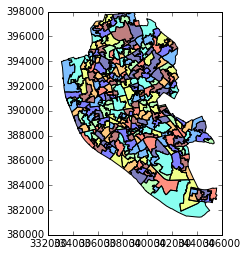

In [5]:
lsoas.plot()

This might not be the most aesthetically pleasant visual representation of the LSOAs geography, but it is hard to argue it is not quick to produce. We will work on styling and customizing spatial plots later on.

**Pro-tip**: if you call a single row of the `geometry` column, it'll return a small plot ith the shape:

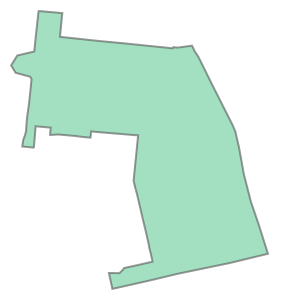

In [6]:
lsoas.loc[0, 'geometry']

* Lines

Displaying lines is as straight-forward as polygons. To load railway tunnels in Liverpool:

In [7]:
rwy_tun = gpd.read_file(los_dir + 'RailwayTunnel.shp')\
             .set_index('id')
rwy_tun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 44 entries, 0ACD196C321E4F8DE050A00A568A6F6F to 0ACD196C313D4F8DE050A00A568A6F6F
Data columns (total 2 columns):
featcode    44 non-null float64
geometry    44 non-null object
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


Note how we have also indexed the table on the `id` column.

A quick plot is similarly generated by (mind that because there are over 18,000 segments, this may take a little bit):

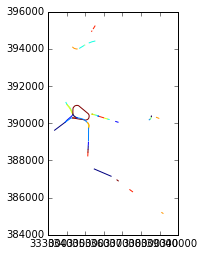

In [9]:
rwy_tun.plot()

Again, this is not the prettiest way to display the roads maybe, and you might want to change a few parameters such as colors, etc. All of this is possible, as we will see below, but this gives us an easy check of what lines look like.

---

**[In-class exercise]**

Obtain the graphical representation of the line with `id` = `0ACD196C32214F8DE050A00A568A6F6F`.

---

* Points

Finally, points follow a similar structure. If we want to represent named places in Liverpool:

In [10]:
namp = gpd.read_file(los_dir + 'NamedPlace.shp')
namp.head()

,classifica,distname,featcode,fontheight,geometry,htmlname,id,orientatio
0,Hydrography,Sugar Brook,15804,Small,POINT (339605 396261),Sugar Brook,0EE7A103C03A8FBFE050A00A568A2502,25
1,Landcover,Sandfield Park,15805,Small,POINT (339758 392357),Sandfield Park,0EE7A104A4B68FBFE050A00A568A2502,0
2,Populated Place,Sandfield Park,15801,Medium,POINT (339768 392217),Sandfield Park,0EE7A1041DB18FBFE050A00A568A2502,0
3,Populated Place,Gillmoss,15801,Medium,POINT (340269 396567),Gillmoss,0EE7A1041DE48FBFE050A00A568A2502,0
4,Populated Place,Croxteth,15801,Medium,POINT (340296 395304),Croxteth,0EE7A1041DE58FBFE050A00A568A2502,0


And the plot is produced by running:

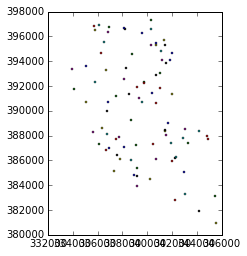

In [11]:
namp.plot()

## Styling plots

It is possible to tweak several aspects of a plot to customize if to particular needs. In this section, we will explore some of the basic elements that will allow us to obtain more compelling maps.

**NOTE**: some of these variations are very straightforward while others are more intricate and require tinkering with the internal parts of a plot. They are not necessarily organized by increasing level of complexity.

* Changing transparency

The intensity of color of a polygon can be easily changed through the `alpha` attribute in plot. This is specified as a value betwee zero and one, where the former is entirely transparent while the latter is the fully opaque (maximum intensity):

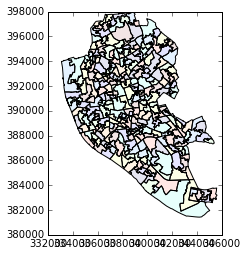

In [12]:
lsoas.plot(alpha=0.1)

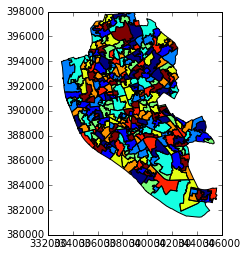

In [13]:
lsoas.plot(alpha=1)

* Removing axes

Although in some cases, the axes can be useful to obtain context, most of the times maps look and feel better without them. Removing the axes involves wrapping the plot into a figure, which takes a few more lines of aparently useless code but that, in time, it will allow you to tweak the map further and to create much more flexible designs:

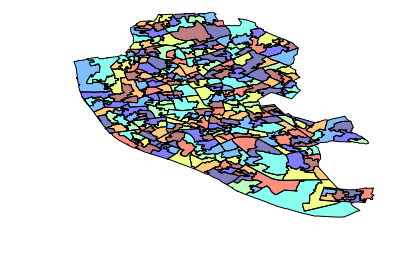

In [14]:
f, ax = plt.subplots(1)
ax = lsoas.plot(axes=ax)
ax.set_axis_off()
plt.show()

Let us stop for a second a study each of the previous lines:

1. We have first created a figure named `f` with one axis named `ax` by using the command `plt.subplots` (part of the library `matplotlib`, which we have imported at the top of the notebook). Note how the method is returning two elements and we can assign each of them to objects with different name (`f` and `ax`) by simply listing them at the front of the line, separated by commas.
1. Second, we plot the geographies as before, but this time we tell the function that we want it to draw the polygons on the axis we are passing, `ax`. This method returns the axis with the geographies in them, so we make sure to store it on an object with the same name, `ax`.
1. On the third line, we effectively remove the box with coordinates.
1. Finally, we draw the entire plot by calling `plt.show()`.

* Adding a title

Adding a title is a simple extra line, if we are creating the plot within a figure, as we just did. To include text on top of the figure:

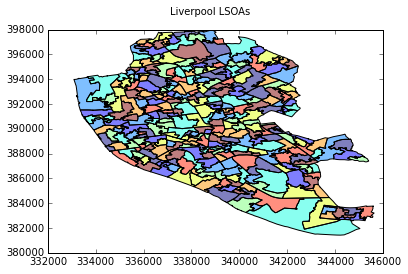

In [15]:
f, ax = plt.subplots(1)
ax = lsoas.plot(axes=ax)
f.suptitle('Liverpool LSOAs')
plt.show()

* Changing the size of the map

The size of the plot is changed equally easily in this context. The only difference is that it is specified when we create the figure with the argument `figsize`. The first number represents the width, the X axis, and the second corresponds with the height, the Y axis.

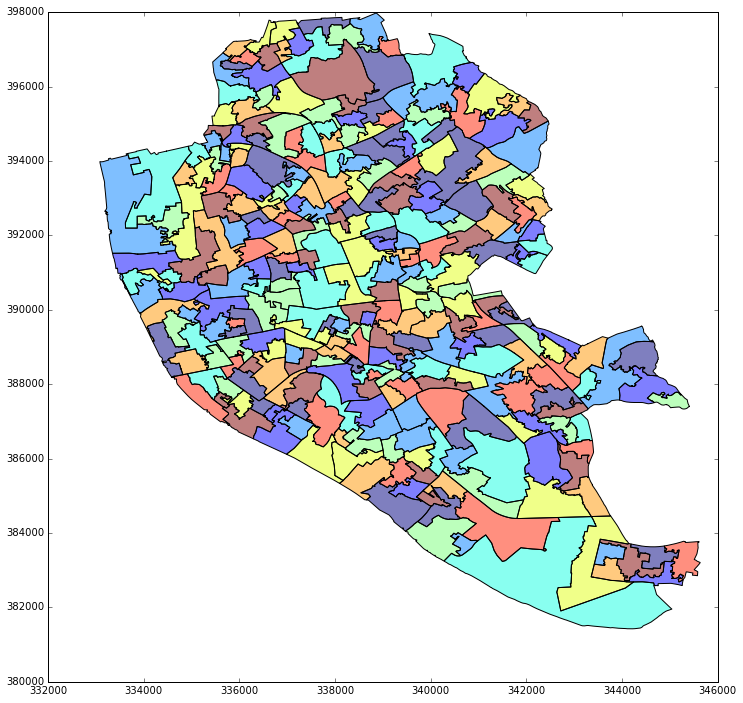

In [16]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = lsoas.plot(axes=ax)
plt.show()

* Modifying borders

Border lines sometimes can distort or impede proper interpretation of a map. In those cases, it is useful to know how they can be modified. Unfortunately, the way to access borders in `geopandas` is not as straightforward as it is the case for other aspects of the map, such as size or frame. Let us first see the code to make the lines thinner and grey, and then we will work our way through the different steps:

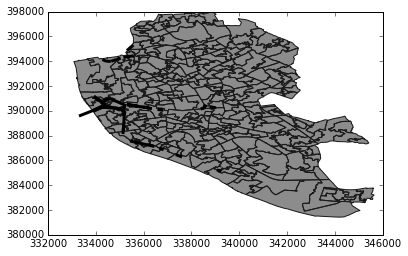

In [43]:
f, ax = plt.subplots(1)
#lsoas.plot(linewidth=3, axes=ax, facecolor='red')
for poly in lsoas.geometry:
    gpd.plotting.plot_multipolygon(ax, poly, alpha=0.5, linewidth=1, facecolor='0.1', edgecolor='0.1')
for line in rwy_tun.geometry:
    gpd.plotting.plot_multilinestring(ax, line, color='k', linewidth=3)
plt.show()

Things to fix in `geopandas`:

* `alpha` passed to all elements in plot_X
* `ax` instead of `axes`
* `facecolor` for polygons, allow `color` for lines

In [ ]:
# Set it in advance for convenience
line_color = 'grey'
line_width = 0.2

f, ax = plt.subplots(1)
lsoas.plot(axes=ax)
for poly in ax.patches:
    poly.set_edgecolor(line_color)
    poly.set_linewidth(line_width)
for line in ax.lines:
    line.set_color(line_color)
    line.set_linewidth(line_width)
plt.show()

Note how the lines are much thinner and discreet.

Let us examine line by line what we are doing in the code snippet:

* For style and convenience, in lines 1 and 2 we first set the color and width we want to change the lines to. This is always good practice but, in this case, it is also useful because these elements need to be changed in more than one part, so it decreases the chance of mistakes.
* Then we create the figure (`f`) object and one axis inside it (`ax`) where we will plot the map.
* In line 6, we actually plot the polygons.

Then comes the tweaking stage. The map is composed of two elements: polygons, and the lines in between them. We need to modify both, and this needs to happen in a separate way:

* Lines 7-9 modify the polygons (`patches`), by changing their edge color (`set_edgecolor`) and witdh (`set_linewidth`).
* Lines 10 and 11 loop over every line in between plots and modify their width.

---

In [ ]:
%%time
f, ax = plt.subplots(1)
lsoas.to_crs(epsg=27700).plot(axes=ax)
for poly in ax.patches:
    poly.set_facecolor('red')
    poly.set_linewidth(0)
for line in ax.lines:
    line.set_linewidth(0)
plt.show()

* Choosing a single color for 

* Transforming CRS

In [ ]:
lsoas.to_crs(epsg=27700).plot()

In [ ]:
lsoas.plot()

## Composing multi-layer maps

* Build a map

* Save it into an image

## Manipulating spatial tables (`GeoDataFrames`)

### Non-spatial manipulations

### Spatial manipulations

* Centroid calculation

* Point in polygon (PiP)

* Spatial joins

* Spatial aggregations

* Buffers

## `[Extension I]` Advanced cartography with `PySAL` and `cartopy`

In [ ]:
%%time
lsoas['ppoly'] = lsoas['geometry'].apply(ps.cg.shapes.asShape)
f, ax = plt.subplots(1)
polys = maps.map_poly_shp(lsoas['ppoly'], bbox=shp.bbox)
ax = maps.setup_ax([polys], ax=ax)
ax.add_collection(polys)
plt.show()

In [ ]:
wgs84 = lsoas.geometry.to_crs(epsg=4326)
bbox = wgs84.bounds.minx.min(), wgs84.bounds.miny.min(), wgs84.bounds.maxx.max(), wgs84.bounds.maxy.max()

import cartopy.crs as ccrs

orig_crs = ccrs.PlateCarree()
extent = [bbox[0], bbox[2], bbox[1], bbox[3]]
x_mean = (extent[1] + extent[0]) / 2.
y_mean = (extent[3] + extent[2]) / 2.
target_crs = ccrs.PlateCarree()

f = plt.figure(figsize=(12, 8))

ax = plt.axes(projection=target_crs)
ax.set_extent(extent, crs=orig_crs)
ax = wgs84.plot(axes=ax)

ax.outline_patch.set_visible(False)

plt.show()

## `[Extension II]` Adding base layers from cloud mapping providers

Use [mplleaflet](https://github.com/jwass/mplleaflet) to create interactive maps ([example](https://github.com/carsonfarmer/python_geospatial/blob/master/notebooks/Notebook4.ipynb)).

## `[Extension III]` Adding base layers from raster imagery

Use [rasterio](https://github.com/mapbox/rasterio) to read in rasters ([example](https://github.com/carsonfarmer/python_geospatial/blob/master/notebooks/Notebook3.ipynb)).

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science'15 - Lab 1</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://darribas.org" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

